<a href="https://colab.research.google.com/github/Dinisa13/careplant/blob/main/Tomatocnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

memanggil library

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import Dense, MaxPooling2D, Dropout, Conv2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision, Accuracy, Recall
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os


memanggil dataset

In [ ]:
import zipfile

with zipfile.ZipFile("/content/drive/MyDrive/Capstone Napoleon/Dataset/TomatoLeafDiseases.zip", 'r') as zip_ref:
    zip_ref.extractall("./")

loading gambar

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Semua gambar (pixelnya) di rescale menjadi rentang 0-1

train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator (rescale=1/255)

# Proses load data train

train_generator = train_datagen. flow_from_directory(
    '/content/TomatoLeafDiseases/train', # Source dari data train
    classes = ['Tomato Leaf Bacterial Spot','Tomato Leaf Early Blight','Tomato Leaf Health','Tomato Leaf Late Blight','Tomato Leaf Mosaic Virus','Tomato Leaf Septoria','Tomato Leaf Yellow Virus'],
    target_size=(200, 200), #Semua gambar akan diresize menjadi 200x200
    batch_size=16)

# Proses load data validation

validation_generator = validation_datagen.flow_from_directory(
    '/content/TomatoLeafDiseases/valid', # Source dari data validation
    classes = ['Tomato Leaf Bacterial Spot','Tomato Leaf Early Blight','Tomato Leaf Health','Tomato Leaf Late Blight','Tomato Leaf Mosaic Virus','Tomato Leaf Septoria','Tomato Leaf Yellow Virus'],
    target_size=(200, 200), # Semua gambar akan diresize menjadi 200x200
    batch_size=16,
    shuffle=False)

# Proses load data test

test_generator = test_datagen.flow_from_directory(
'/content/TomatoLeafDiseases/test', # Source dari data test
 classes = ['Tomato Leaf Bacterial Spot','Tomato Leaf Early Blight','Tomato Leaf Health','Tomato Leaf Late Blight','Tomato Leaf Mosaic Virus','Tomato Leaf Septoria','Tomato Leaf Yellow Virus'],
 target_size=(200, 200), # Semua gambar akan diresize menjadi 200x200
 batch_size=16,
 shuffle=False)

Found 7263 images belonging to 7 classes.
Found 3429 images belonging to 7 classes.
Found 764 images belonging to 7 classes.


arsitektur cnn

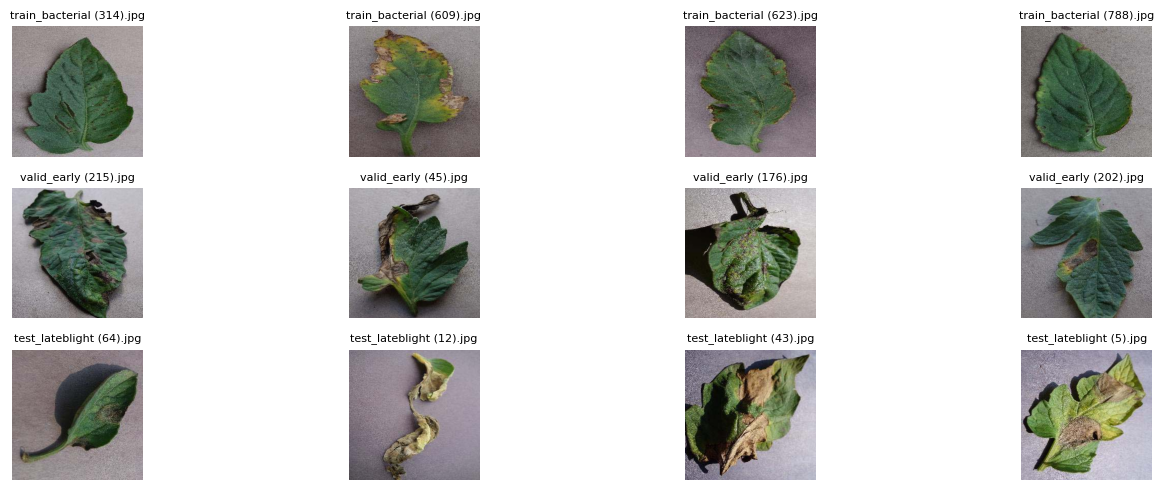

In [ ]:
cols = 4
rows = 1
fig = plt.figure(figsize=(15, 5))

image_directories = [
    "/content/TomatoLeafDiseases/train/Tomato Leaf Bacterial Spot",
    "/content/TomatoLeafDiseases/valid/Tomato Leaf Early Blight",
    "/content/TomatoLeafDiseases/test/Tomato Leaf Late Blight"
]

for dir_index, image_directory in enumerate(image_directories):
    all_items = os.listdir(image_directory)
    image_files = [item for item in all_items if os.path.isfile(os.path.join(image_directory, item))]
    size = min(len(image_files), cols * rows)
    selected_images = np.random.choice(image_files, size=size, replace=True)
    for i, image_file in enumerate(selected_images):
        image_path = os.path.join(image_directory, image_file)
        try:
            img = plt.imread(image_path)
            ax = fig.add_subplot(len(image_directories), cols, dir_index * cols + i + 1)
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(image_file, fontsize=8)
        except Exception as e:
            print(f"Error loading image {image_file}: {e}")

plt.tight_layout()
plt.show()


In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(200,200, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D (64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense (64, activation='relu'))
model.add(Dense (256, activation='relu'))
model.add(Dropout (0.3))
model.add(Dense (7, activation='softmax'))


In [ ]:
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7fb93c0871c0>>

In [ ]:
from tensorflow.keras.metrics import Recall, Precision

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics= [Recall(), Precision(), "accuracy"]
)

In [ ]:
model_callback = EarlyStopping(
    monitor = 'loss',
    verbose= 1,
    mode = 'min',
    patience = 3
)


training

In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=100,
    steps_per_epoch=50,
    callbacks = [model_callback],
    verbose=1
)

Epoch 1/100
50/50 [==============================] - 68s 1s/step - loss: 1.8475 - recall: 0.0275 - precision: 0.6111 - accuracy: 0.2237 - val_loss: 1.7691 - val_recall: 0.0962 - val_precision: 0.6600 - val_accuracy: 0.2604
Epoch 2/100
50/50 [==============================] - 70s 1s/step - loss: 1.5719 - recall: 0.1312 - precision: 0.6818 - accuracy: 0.3887 - val_loss: 1.4012 - val_recall: 0.2473 - val_precision: 0.6615 - val_accuracy: 0.4477
Epoch 3/100
50/50 [==============================] - 71s 1s/step - loss: 1.2381 - recall: 0.3013 - precision: 0.7047 - accuracy: 0.5400 - val_loss: 1.0524 - val_recall: 0.3887 - val_precision: 0.8310 - val_accuracy: 0.6395
Epoch 4/100
50/50 [==============================] - 70s 1s/step - loss: 1.0469 - recall: 0.4725 - precision: 0.7530 - accuracy: 0.6263 - val_loss: 0.9863 - val_recall: 0.5232 - val_precision: 0.6983 - val_accuracy: 0.6314
Epoch 5/100
50/50 [==============================] - 71s 1s/step - loss: 0.9667 - recall: 0.5250 - precision

prediksi data test

In [ ]:
model.evaluate(test_generator)

48/48 [==============================] - 10s 215ms/step - loss: 0.5788 - recall: 0.7880 - precision: 0.8725 - accuracy: 0.8194


[0.5787702798843384,
 0.7879580855369568,
 0.8724637627601624,
 0.8193717002868652]

visualisasi

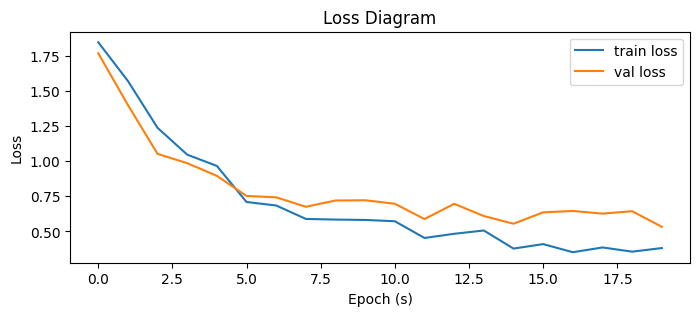

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 3))
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])
plt.legend(['train loss', 'val loss'])
plt.title('Loss Diagram')
plt.xlabel('Epoch (s)')
plt.ylabel('Loss')
plt.show()


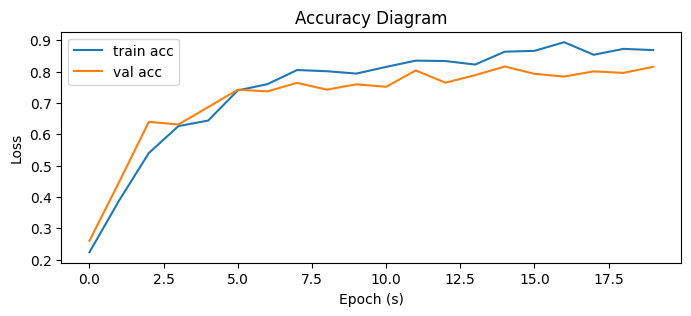

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 3))
plt.plot(history.epoch, history.history['accuracy'])
plt.plot(history.epoch, history.history['val_accuracy'])
plt.legend(['train acc', 'val acc'])
plt.title('Accuracy Diagram')
plt.xlabel('Epoch (s)')
plt.ylabel('Loss')
plt.show()


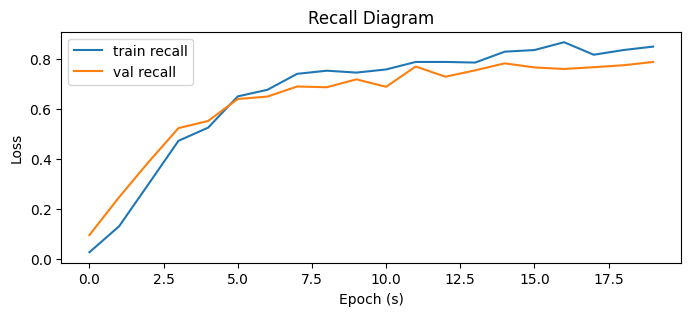

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 3))
plt.plot(history.epoch, history.history['recall'])
plt.plot(history.epoch, history.history['val_recall'])
plt.legend(['train recall', 'val recall'])
plt.title('Recall Diagram')
plt.xlabel('Epoch (s)')
plt.ylabel('Loss')
plt.show()

In [ ]:
model.save('Model_cnn (2).h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(200, 200))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)

  classes = model.predict(img_array/255);

  for i, class_ in enumerate(classes[0]):
      if class_ == classes[0].max():
          if i == 0:
              print(" Tomato Leaf Bacterial Spot")
          elif i == 1:
              print("Tomato Leaf Early Blight")
          elif i == 2:
              print("Tomato Leaf Health")
          elif i == 3:
              print("Tomato Leaf Late Blight")
          elif i == 4:
              print("Tomato Leaf Mosaic Virus")
          elif i == 5:
              print("Tomato Leaf Septoria")
          else:
              print("Tomato Leaf Yellow Virus")